## A Retail store is required to analyze the day-to-day transactions and keep a track of its customers spread across various locations along with their purchases/returns across various categories.

### Create a report and display the below calculated metrics, reports and inferences.

In [2]:
import pandas as pd 
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [3]:
customer = pd.read_csv(r'Retail CaseStudy/Customer.csv')
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
prod = pd.read_csv(r'Retail CaseStudy/prod_cat_info.csv')
prod.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [5]:
transaction = pd.read_csv(r'Retail CaseStudy/Transactions.csv')
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


### 1) Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [6]:
prod.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [7]:
prod.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [8]:
prod1 = pd.merge(left=transaction, right=prod,on=['prod_cat_code','prod_subcat_code'],how='left')

In [9]:
prod1

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [10]:
Customer_Final = pd.merge(left=prod1, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

In [11]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0


In [71]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

In [13]:
Customer_Final["tran_date"]

0       2014-02-28
1       2014-02-27
2       2014-02-24
3       2014-02-24
4       2014-02-23
           ...    
23048   2011-01-25
23049   2011-01-25
23050   2011-01-25
23051   2011-01-25
23052   2011-01-25
Name: tran_date, Length: 23053, dtype: datetime64[ns]

In [14]:
Customer_Final["DOB"] = pd.to_datetime(Customer_Final["DOB"], format="%d-%m-%Y")

In [15]:
Customer_Final.duplicated().sum()

13

In [16]:
Customer_Final.drop_duplicates(inplace=True)

In [17]:
Customer_Final.duplicated().sum()

0

### 2) Prepare a summary report for the merged data set.

### a) Get the column names and their corresponding data types.

In [18]:
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

In [19]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

### b) Top/Bottom 10 observations.

In [20]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [21]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


### c) “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [22]:
Customer_Final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271021.880252,5.483067
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.573668,2.863331
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270980.500000,5.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273114.250000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


### d) Frequency tables for all the categorical variables.

In [23]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
 10  prod_cat          23040 non-null  object        
 11  prod_subcat       23040 non-null  object        
 12  customer_Id       23040 non-null  int64         
 13  DOB               23040 non-null  datetime64[ns]
 14  Gender            2303

In [24]:
Customer_Final.loc[:,Customer_Final.dtypes=="object"].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


### 3) Generate histograms for all continuous variables and frequency bars for categorical variables.

In [25]:
x = Customer_Final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

In [26]:
x

,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
0,1,1,-5,-772,405.300,-4265.300
1,5,3,-5,-1497,785.925,-8270.925
2,6,5,-2,-791,166.110,-1748.110
3,11,6,-3,-1363,429.345,-4518.345
4,6,5,-2,-791,166.110,-1748.110
...,...,...,...,...,...,...
23048,12,5,1,1264,132.720,1396.720
23049,4,1,1,677,71.085,748.085
23050,2,6,4,1052,441.840,4649.840
23051,11,5,3,1142,359.730,3785.730


### Histograms for all continuous variables

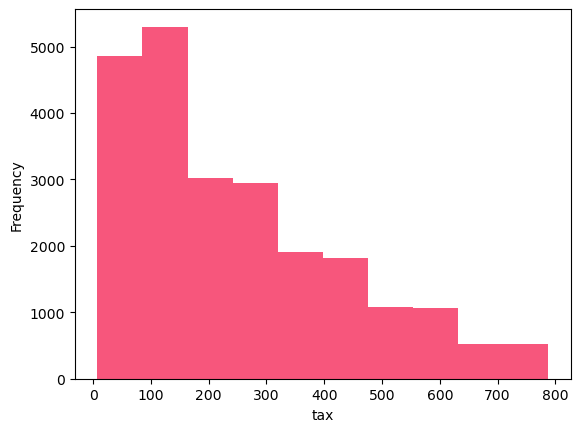

In [27]:
Tax = Customer_Final['Tax']
plt.hist(Tax,color=['#F7567C'])
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.show()

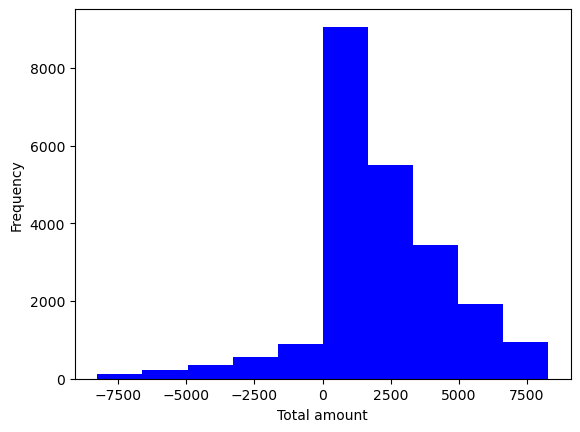

In [28]:
Total_Amt = Customer_Final['total_amt']
plt.hist(Total_Amt,color = 'Blue')
plt.xlabel('Total amount')
plt.ylabel('Frequency')
plt.show()

### Frequency bars for categorical variables.

In [29]:
cat_cust = Customer_Final.loc[:,Customer_Final.dtypes=='object']

In [30]:
cat_cust.head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'F')])

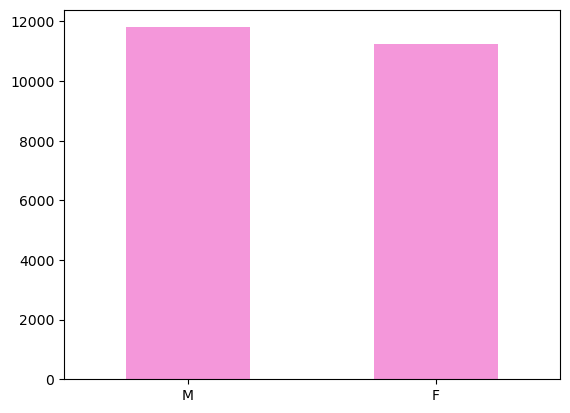

In [31]:
cat_cust['Gender'].value_counts().plot(kind='bar',color='#f497da')
plt.xticks(rotation = 360)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'e-Shop'),
  Text(1, 0, 'MBR'),
  Text(2, 0, 'Flagship store'),
  Text(3, 0, 'TeleShop')])

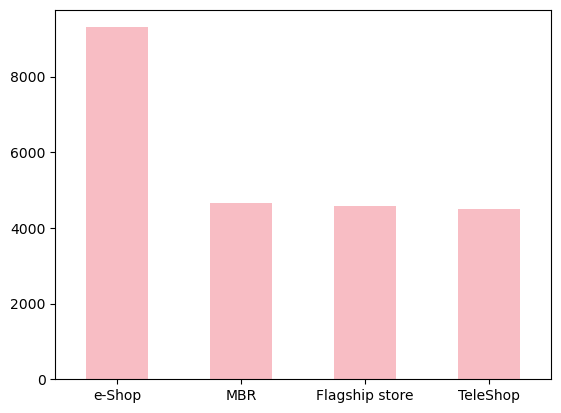

In [32]:
Customer_Final['Store_type'].value_counts().plot(kind='bar',color='#F8BDC4')
plt.xticks(rotation = 360)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Home and kitchen'),
  Text(3, 0, 'Footwear'),
  Text(4, 0, 'Clothing'),
  Text(5, 0, 'Bags')])

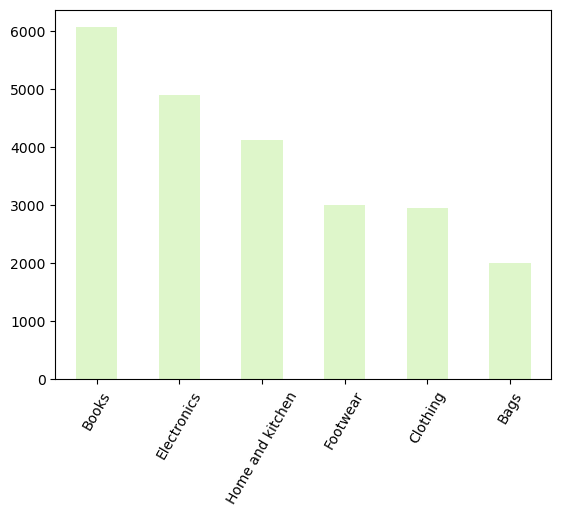

In [33]:
Customer_Final['prod_cat'].value_counts().plot(kind='bar',color='#DEF6CA')
plt.xticks(rotation = 60)

<AxesSubplot:>

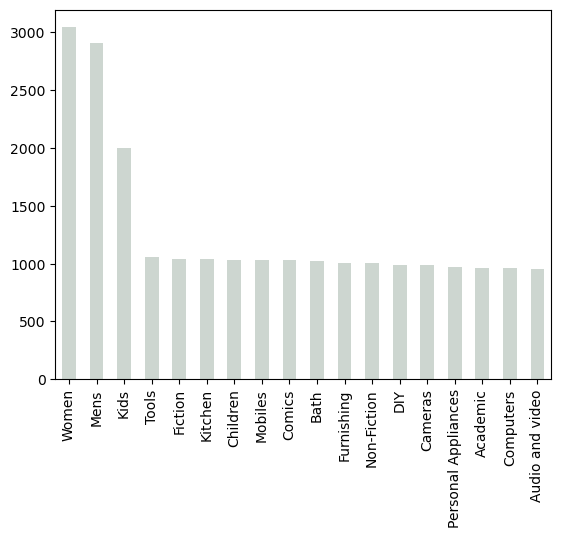

In [34]:
Customer_Final['prod_subcat'].value_counts().plot(kind='bar',color='#CDD6D0')

### 4) Calculate the following information using the merged dataset :
### a) Time period of the available transaction data

In [35]:
min_date = Customer_Final["tran_date"].min()

In [36]:
max_date = Customer_Final["tran_date"].max()

In [37]:
print('Time period of the available transaction data is from '+ pd.Timestamp.strftime(min_date,format='%d-%m-%Y') + ' to ' + pd.Timestamp.strftime(max_date,format='%d-%m-%Y'))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


### b) Count of transactions where the total amount of transaction was negative.

In [38]:
negative_tran = Customer_Final.loc[Customer_Final['total_amt'] < 0, 'transaction_id'].count()

In [39]:
print('The total amount negative transactions are',negative_tran)

The total amount negative transactions are 2164


### 5) Analyze which product categories are more popular among females vs male customers.

In [40]:
product_gender = Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].sum().reset_index()

In [41]:
product_gender

,Gender,prod_cat,Qty
0,F,Bags,2364
1,F,Books,7080
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3721
5,F,Home and kitchen,4898
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6486


In [42]:
product_gender.pivot(index='Gender',columns='prod_cat',values='Qty')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


### 6) Which City code has the maximum customers and what was the percentage of customers from that city? 

In [43]:
max_cust = Customer_Final.groupby('city_code')['customer_Id'].count().sort_values(ascending = False)

In [44]:
max_cust.head()

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
Name: customer_Id, dtype: int64

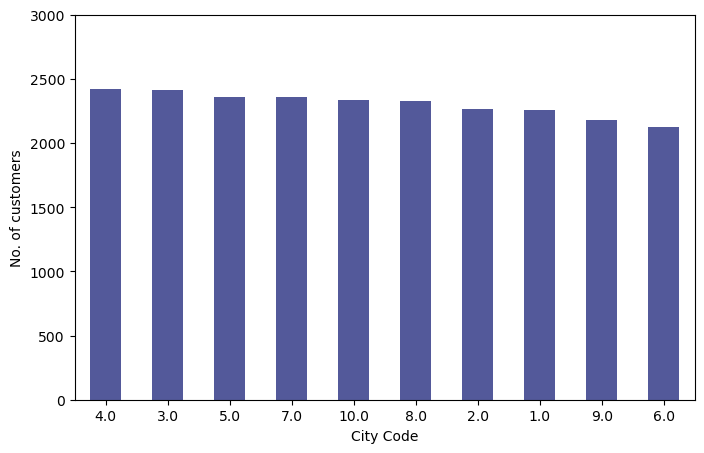

In [45]:
plt.figure(figsize=(8,5))
max_cust.plot(kind='bar',color = '#53599A')
plt.xlabel('City Code')
plt.ylabel('No. of customers')
plt.xticks(rotation = 360)
plt.yticks(np.arange(0, 3500, step=500))
plt.show()

In [46]:
percentage = round((max_cust[4.0] / max_cust.sum()) * 100,2)

In [47]:
percentage

10.52

### 7) Which store type sells the maximum products by value and by quantity?

In [48]:
Customer_Final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty',ascending = False)

C:\Users\Mahadev\AppData\Local\Temp\ipykernel_1808\4051248949.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Customer_Final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty',ascending = False)


,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


### 8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores? 

In [49]:
store = round(Customer_Final.pivot_table(index = 'prod_cat',columns = 'Store_type', values='total_amt', aggfunc='sum'),2)

In [50]:
store

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.68,789181.06,1617933.26
Books,2493677.81,2496039.19,2545714.47,5297161.16
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107969.83,1978457.20,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.38,3327977.12


In [51]:
store.loc[['Electronics','Clothing'],'Flagship store']

prod_cat
Electronics    2215136.04
Clothing       1194423.23
Name: Flagship store, dtype: float64

In [52]:
store.loc[['Electronics','Clothing'],'Flagship store'].sum()

3409559.27

### 9) What was the total amount earned from "Male" customers under the "Electronics" category?

In [53]:
total = round(Customer_Final.pivot_table(index = 'prod_cat',columns='Gender', values='total_amt', aggfunc='sum'),2)

In [54]:
total

Gender,F,M
prod_cat,,
Bags,2079618.84,2046722.99
Books,6174590.82,6645972.78
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5711351.62
Footwear,3203155.22,3020200.36
Home and kitchen,4133702.24,4305169.50


In [55]:
male_earn = total.loc["Electronics","M"]

In [56]:
print('The total amount earned from Male customers under the Electronics category is',male_earn)

The total amount earned from Male customers under the Electronics category is 5711351.62


### 10) How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [57]:
neg_transactions = Customer_Final.loc[Customer_Final['total_amt'] > 0,:]

In [58]:
neg_transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-03-09,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [59]:
unique_trans = neg_transactions.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [60]:
unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [61]:
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

In [62]:
unique_trans_count.head()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [63]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,customer_Id,transaction_id


In [64]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


### 11) For all customers aged between 25 - 35, find out:

In [65]:
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB, format = "%d-%m-%Y")
DOB = Customer_Final.DOB

In [66]:
Customer_Final['age'] = DOB.apply(lambda x: pd.to_datetime('today').year-x.year)

In [67]:
aged = Customer_Final[(Customer_Final.age>=25) & (Customer_Final.age<=35)].reset_index(drop=True)
aged.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,age
0,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30
1,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30
2,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,33
3,88853694830,268444,2014-02-20,4,4,-3,-80,25.20,-265.20,MBR,Bags,Women,268444,1992-01-02,F,6.0,30
4,99581788104,267466,2014-02-20,3,2,1,96,10.08,106.08,Flagship store,Footwear,Women,267466,1987-08-06,F,7.0,35


### a) What was the total amount spent for “Electronics” and “Books” product categories?

In [68]:
amt_spend = aged.groupby('prod_cat')['total_amt'].sum().reset_index()
amt_spend

,prod_cat,total_amt
0,Bags,1051851.710
1,Books,3174082.665
2,Clothing,1815131.565
3,Electronics,2884375.975
4,Footwear,1734757.180
5,Home and kitchen,2300116.065


In [69]:
amt_spend[(amt_spend.prod_cat=='Electronics') | (amt_spend.prod_cat=='Books')]

,prod_cat,total_amt
1,Books,3174082.665
3,Electronics,2884375.975


### b) What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [70]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

t_date = Customer_Final[(Customer_Final['tran_date'] > '2014-01-01') & (Customer_Final['tran_date'] < '2014-03-01')]
total_amount = t_date.total_amt.sum()
print('Total amount spent by the customer : ',total_amount)

Total amount spent by the customer :  1305716.6199999999
